In [43]:
import PIL
import requests
import torch
from io import BytesIO

from diffusers import StableDiffusionInpaintPipeline


def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")

def load_image(path):
    return PIL.Image.open(path).convert("RGB")


img_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo.png"
mask_url = "https://raw.githubusercontent.com/CompVis/latent-diffusion/main/data/inpainting_examples/overture-creations-5sI6fQgYIuo_mask.png"

text_encoder\model.safetensors not found


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

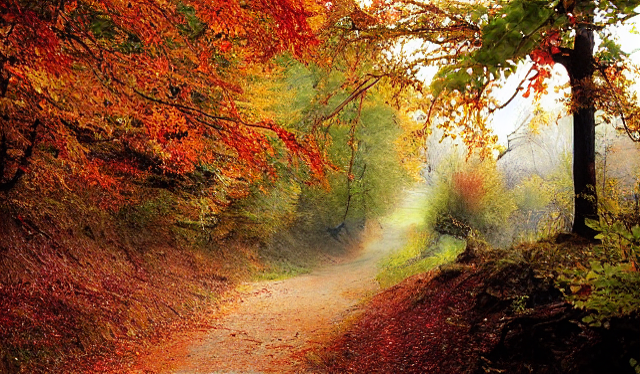

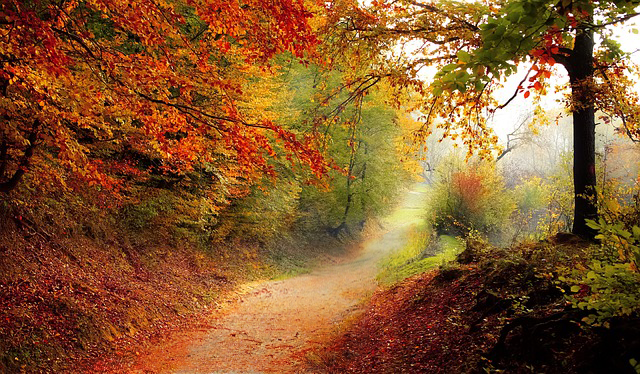

In [52]:
import math

filename = "fence"

image_file = f"examples/inpaint/testImages/{filename}.png"
mask_file = f"examples/inpaint/masks/{filename}_mask.png"

init_image = load_image(image_file) #.resize((512, 512))
mask_image = load_image(mask_file) #.resize((512, 512))

w, h = init_image.size
w_divisible = math.ceil(w/8)*8
h_divisible = math.ceil(h/8)*8

pipe = StableDiffusionInpaintPipeline.from_pretrained(
    "runwayml/stable-diffusion-inpainting", torch_dtype=torch.float16
)
pipe = pipe.to("cuda")

prompt = "fill background"
image = pipe(prompt=prompt, image=init_image, mask_image=mask_image, height=h_divisible, width=w_divisible).images[0]
image = image.resize((w, h))

display(image)

# only use masked area of the inpainted output
init_image.paste(image, (0, 0), mask_image.convert("L"))

display(init_image)

init_image.save(f"examples/inpaint/results_diffusion/{filename}.png")